# IBM HR Employee Attrition & Performance.

## CONTENTS ::->

[ **1 ) Exploratory Data Analysis**](#content1)

[ **2) Corelation b/w Features**](#content2)

[**3) Feature Selection**](#content3)

[ **4) Preparing Dataset**](#content5)

[ **5) Modelling**](#content5)

[ **6) Conclusions**](#content6)

<a id="content1"></a>
## 1 ) Exploratory Data Analysis

In [0]:
pip install -U imbalanced-learn

## 1.1 ) Importing Various Modules

In [3]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#import missingno as msno



## 1.2 ) Reading the data from a CSV file

In [5]:
df=pd.read_csv("D:\projects\R Project - Attrition\Attrition.csv")

In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
df.shape

(1470, 35)

In [8]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## 1.3 ) Missing Values Treatment

In [9]:
df.info()  # no null or 'Nan' values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Note :No missing values in the dataset

## 1.4 ) The Features and the 'Target'

In [10]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [11]:
df['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

 In all we have 34 features consisting of both the categorical as well as the numerical features. The target variable is the 
 'Attrition' of the employee which can be either a Yes or a No. This is what we have to predict.

**Hence this is a Binary Classification problem. **

## 1.5 ) Univariate Analysis

In this section we have done the univariate analysis i.e. we have analysed the range or distribution of the values that various features take. To better analyze the results we have plotted various graphs and visualizations wherever necessary.

In [12]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


 Let us first analyze the various numeric features. To do this we can actually plot a boxplot showing all the numeric features. Also the distplot or a histogram is a reasonable choice in such cases.

### **Dividing features into Numerical and Categorical Types**


In [13]:
numerical = df.dtypes[df.dtypes != "object"].index
print("numerical features:\n", numerical)

print("--"*50)

categorical = df.dtypes[df.dtypes== "object"].index
print("categorical features:\n", categorical)

numerical features:
 Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
----------------------------------------------------------------------------------------------------
categorical features:
 Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


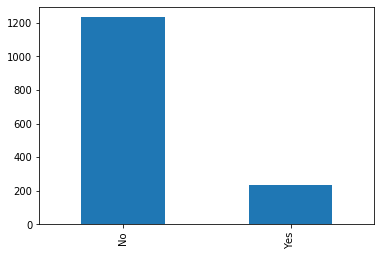

In [14]:
# We will find here count of attrition in data :
df["Attrition"].value_counts().plot(kind = "bar", x = df["Attrition"])

**Note that the number of observations belonging to the 'No'  category is way greater than that belonging to 'Yes' category. Hence we have skewed classes and this is a typical example of the 'Imbalanced Classification Problem'. To handle such types of problems we need to use the over-sampling or under-sampling techniques. I shall come back to this point later.**

**We will analyze relation between caegorical features and target variable**

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


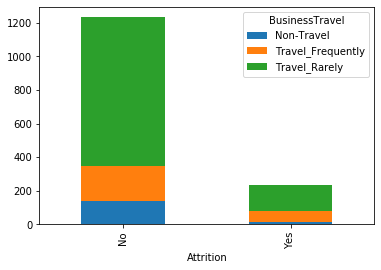

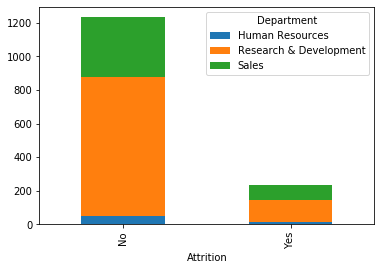

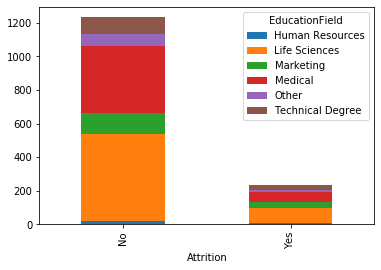

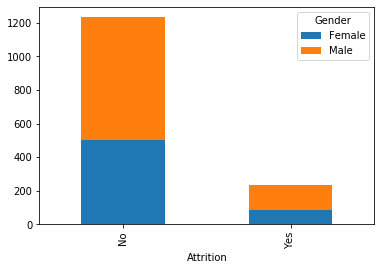

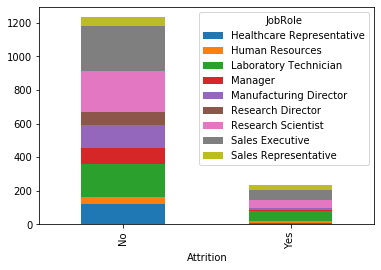

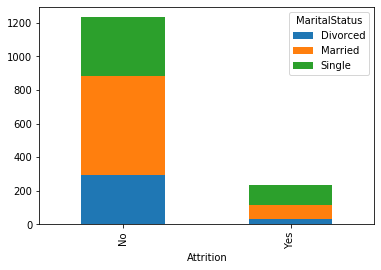

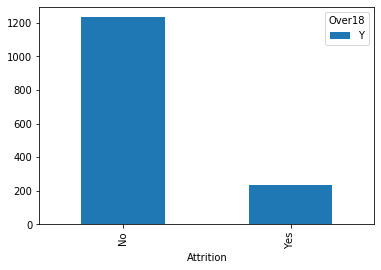

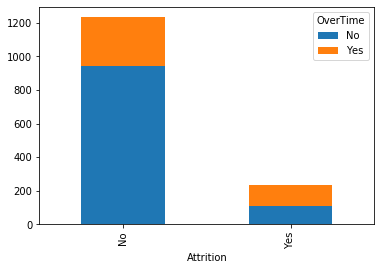

In [15]:
cat = categorical.tolist()
type(cat)
print(cat)

for x in cat:
    if x != "Attrition":
        df[categorical].groupby(["Attrition", x])[x].count().unstack().plot(kind = "bar", stacked = True)

**Key Points**


1.According to business travel graph, surprisingly employees who travel rarely have more attrition rate as compared to travel frequentlty.

2.Employees which are working in Human resource department has very less attrition.

3.As compared to other, Life science and Medical fields have more attrition as compared to other educations.

**Finding relation between various numrical variables and target variable.**
numerical features:
 Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

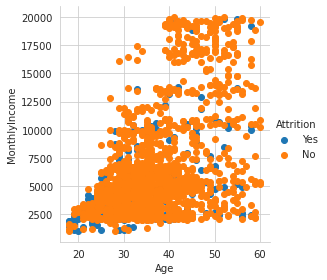

In [59]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Attrition", size=4) \
   .map(plt.scatter, "Age", "MonthlyIncome") \
   .add_legend();
plt.show();

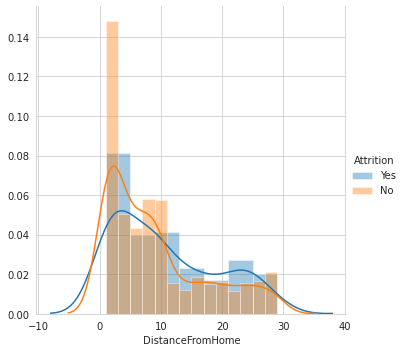

In [23]:
sns.FacetGrid(df, hue="Attrition", size=5) \
   .map(sns.distplot, "DistanceFromHome") \
   .add_legend();
plt.show();

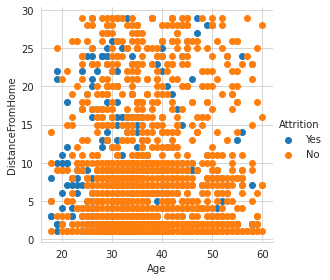

In [60]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Attrition", size=4) \
   .map(plt.scatter, "Age", "DistanceFromHome") \
   .add_legend();
plt.show();

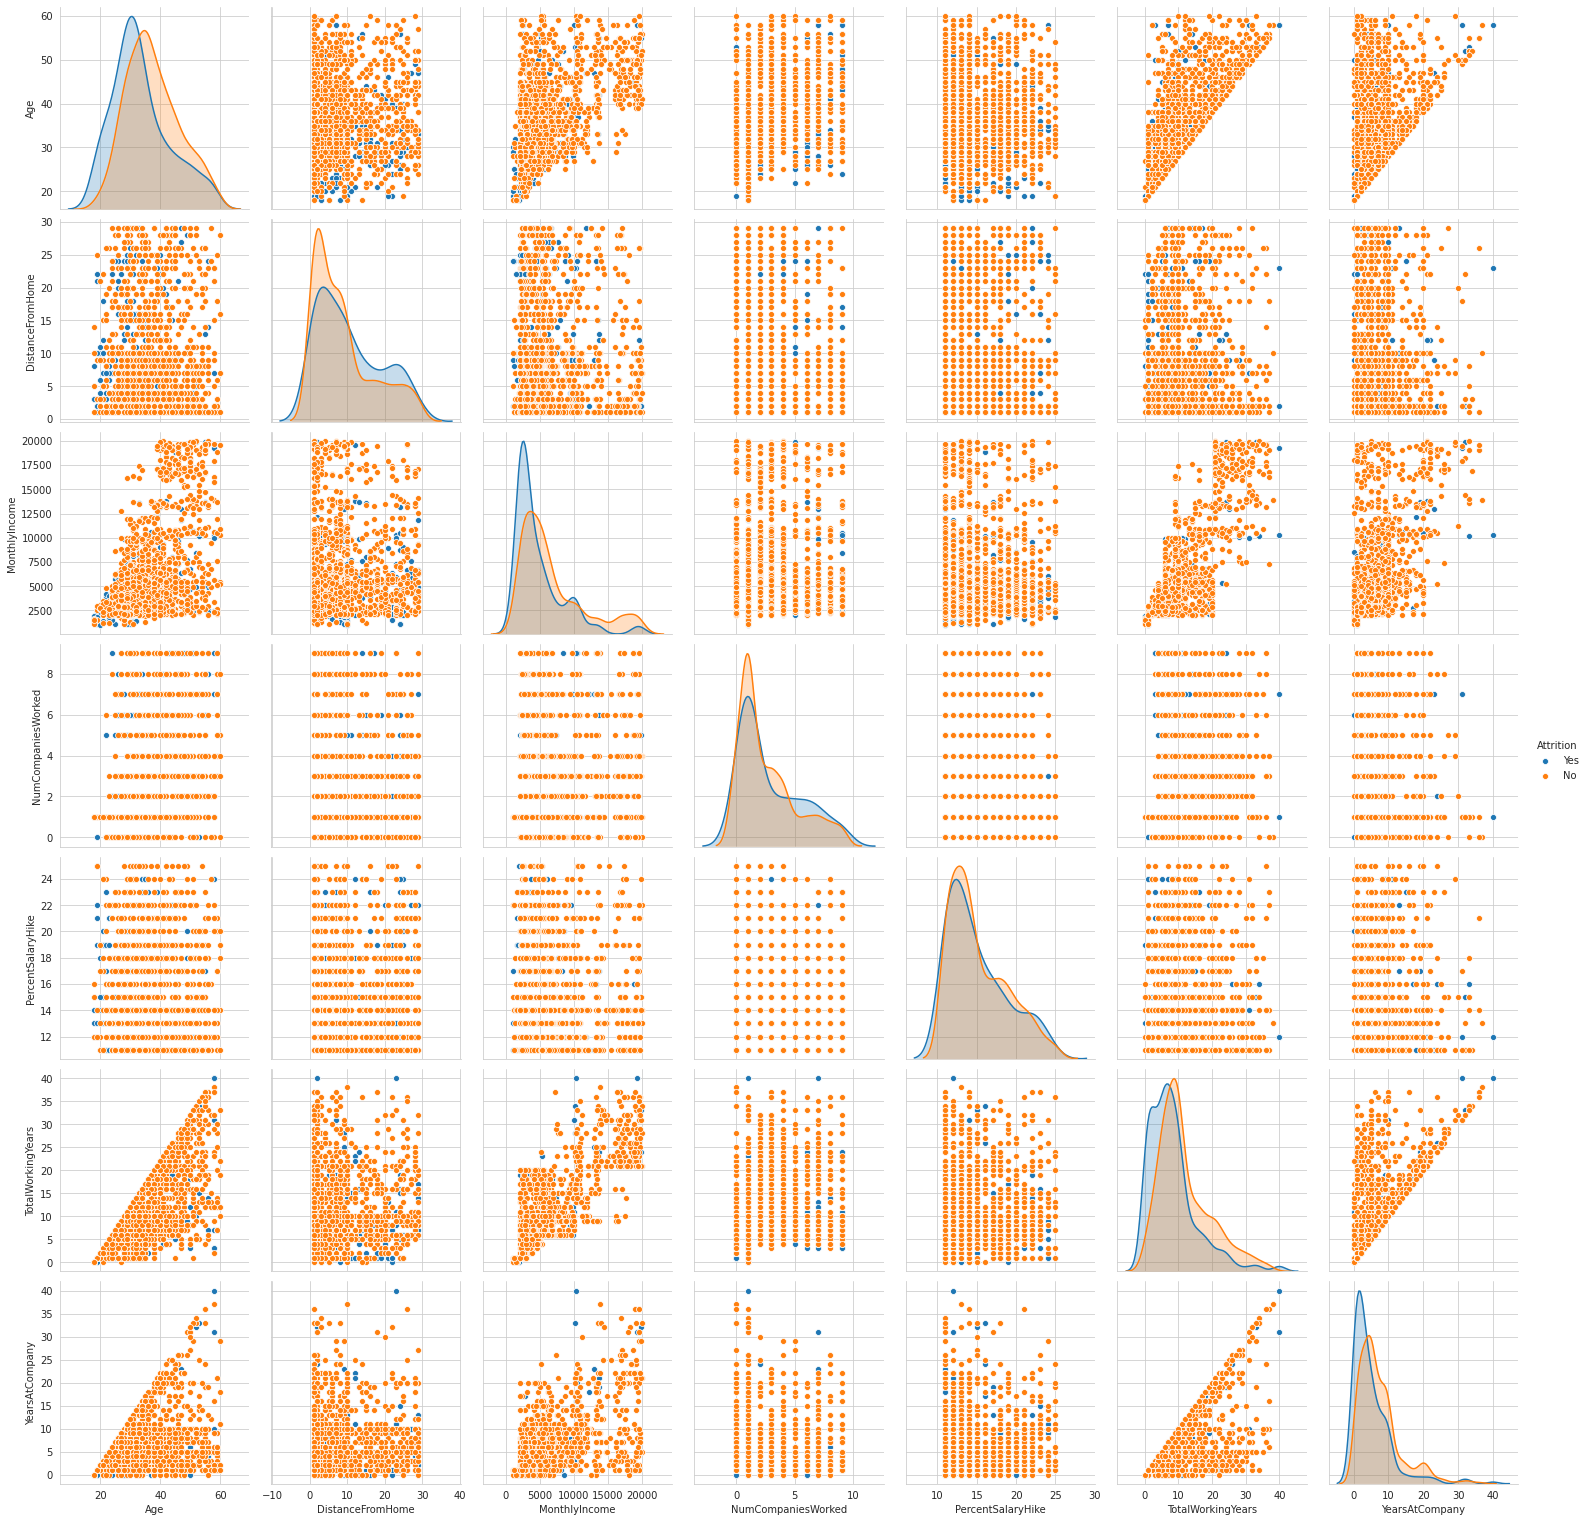

In [61]:
#Pairplot
pair_df =df[['Age','DistanceFromHome','MonthlyIncome', 'NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','Attrition']]

plt.close();
sns.set_style("whitegrid");
sns.pairplot(pair_df, hue="Attrition", size=3);
plt.show()

## **Box-Plots**


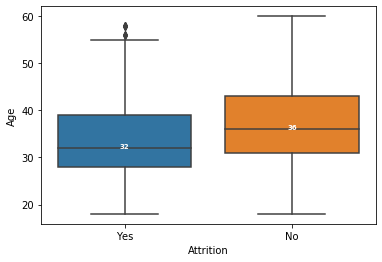

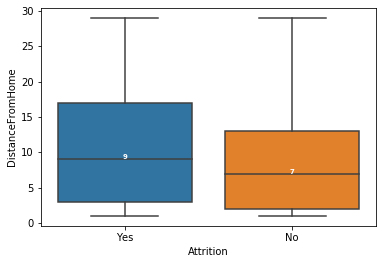

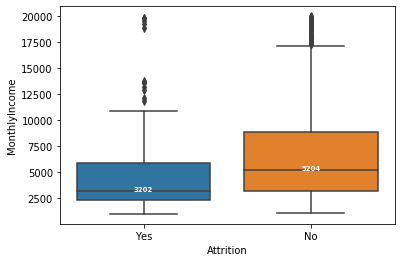

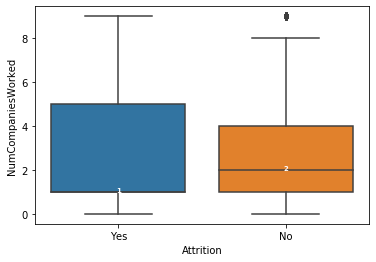

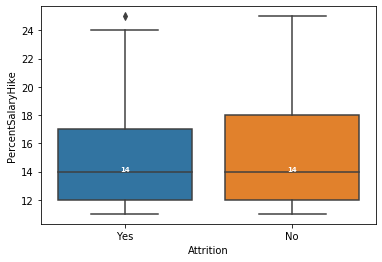

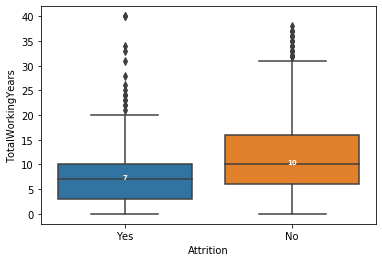

In [16]:

import warnings
warnings.filterwarnings("ignore")
#num = numerical.tolist()
num = ['Age', 'DistanceFromHome','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears']
for j in num:
    fig, ax = plt.subplots()
    ax = sns.boxplot(y = df[j], x = df["Attrition"], data = df)
    median = df.groupby(['Attrition'])[j].median().values
    median_labels = [str(np.round(s, 2)) for s in median]
    pos = range(len(median))
    for i in pos:
        ax.text(pos[i-1], median[i], median_labels[i], 
        horizontalalignment='center', size='x-small', color='w', weight='semibold')

**Note:** 
1.Employees which worked with more than 4 companies tends to leave the association

2. Employees having grater than 10 years of experience having very lesser attrition.

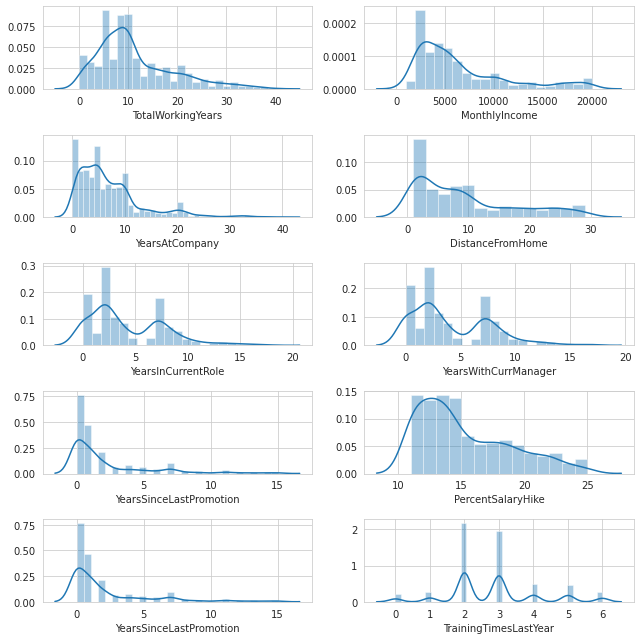

In [63]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

fig,ax = plt.subplots(5,2, figsize=(9,9))                
sns.distplot(df['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(df['MonthlyIncome'], ax = ax[0,1]) 
sns.distplot(df['YearsAtCompany'], ax = ax[1,0]) 
sns.distplot(df['DistanceFromHome'], ax = ax[1,1]) 
sns.distplot(df['YearsInCurrentRole'], ax = ax[2,0]) 
sns.distplot(df['YearsWithCurrManager'], ax = ax[2,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[3,0]) 
sns.distplot(df['PercentSalaryHike'], ax = ax[3,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[4,0]) 
sns.distplot(df['TrainingTimesLastYear'], ax = ax[4,1]) 
plt.tight_layout()
plt.show()

<a id="content2"></a>
## 2 ) Corelation b/w Features


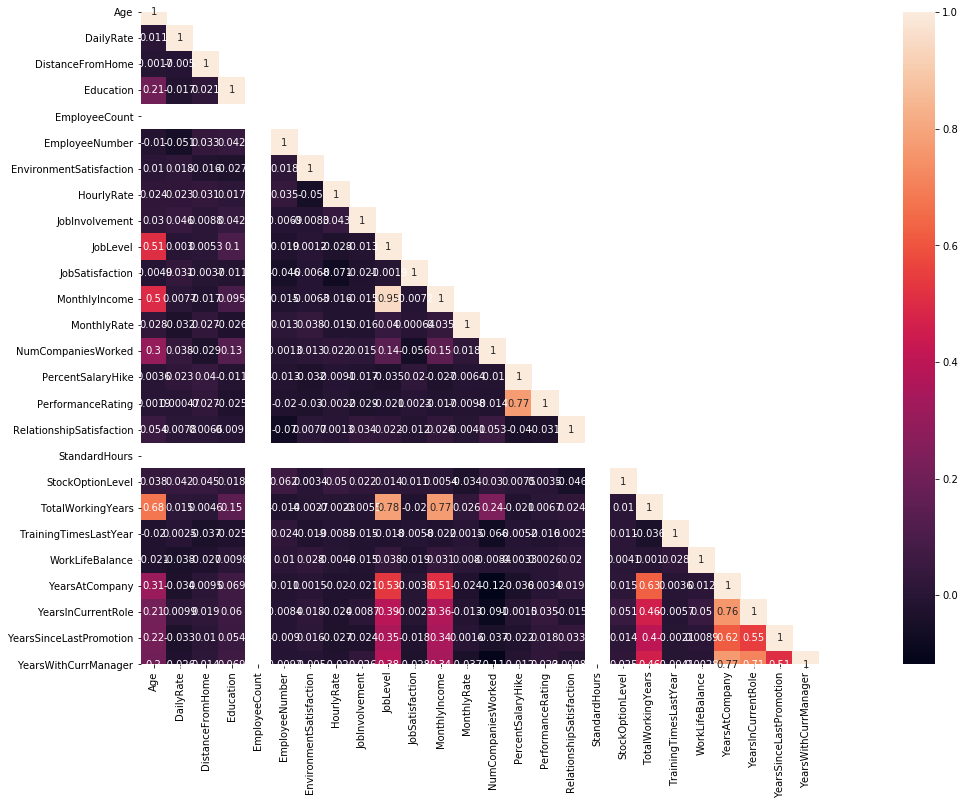

In [17]:
#corelation matrix.
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

###### SOME INFERENCES FROM THE ABOVE HEATMAP

1. Self relation ie of a feature to itself is equal to 1 as expected.

2. JobLevel is highly related to Age as expected as aged employees will generally tend to occupy higher positions in the company.

3. MonthlyIncome is very strongly related to joblevel as expected as senior employees will definately earn more.

4. PerformanceRating is highly related to PercentSalaryHike which is quite obvious.

5. Also note that TotalWorkingYears is highly related to JobLevel which is expected as senior employees must have worked for a larger span of time.

6. YearsWithCurrManager is highly related to YearsAtCompany.

7. YearsAtCompany is related to YearsInCurrentRole.

  

**Note that we can drop some highly corelated features as they add redundancy to the model but since the corelation is very less in genral let us keep all the features for now. In case of highly corelated features we can use something like Principal Component Analysis(PCA) to reduce our feature space.**

In [18]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

<a id="content3"></a>
## 3 ) Feature Selection


## 3.1 ) Plotting the Features against the 'Target' variable.

####  3.1.1 ) Age

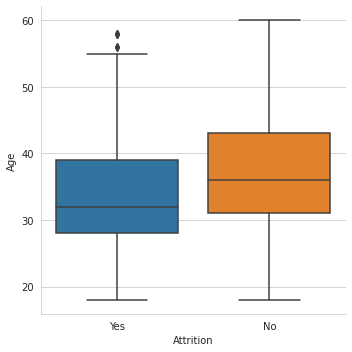

In [65]:
sns.factorplot(data=df,y='Age',x='Attrition',size=5,aspect=1,kind='box')

Note :The median as well the maximum age of the people with 'No' attrition is higher than that of the 'Yes' category. This shows that people with higher age have lesser tendency to leave the organisation which makes sense as they may have settled in the organisation.

#### 3.1.2 ) Department

Here both Attrition(Target) as well as the Deaprtment are categorical.So, we have used  cross-tabulation.

In [66]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

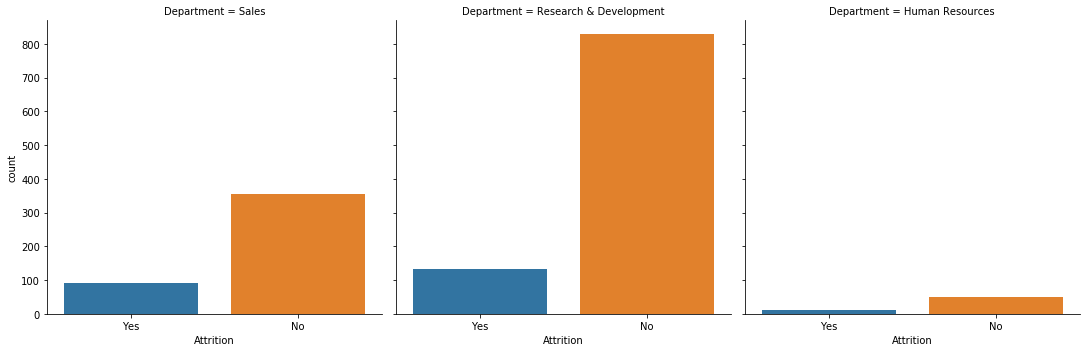

In [0]:
sns.factorplot(data=df,kind='count',x='Attrition',col='Department')

In [0]:
pd.crosstab(columns=[df.Attrition],index=[df.Department],margins=True,normalize='index') 

Attrition,No,Yes
Department,,
Human Resources,0.809524,0.190476
Research & Development,0.861602,0.138398
Sales,0.793722,0.206278
All,0.838776,0.161224


Note : Most of the observations corresspond to 'No' as we saw previously also. About 81 % of the people in HR dont want to leave the organisation and only 19 % want to leave.

#### 3.1.3 ) Gender

In [0]:
pd.crosstab(columns=[df.Attrition],index=[df.Gender],margins=True,normalize='index')

Attrition,No,Yes
Gender,,
Female,0.852041,0.147959
Male,0.829932,0.170068
All,0.838776,0.161224


Note: About 85 % of females want to stay in the organisation while only 15 % want to leave the organisation. All in all 83 % of employees want to be in the organisation with only being 16% wanting to leave the organisation or the company.

#### 3.1.4 ) Job Level

In [0]:
pd.crosstab(columns=[df.Attrition],index=[df.JobLevel],margins=True,normalize='index')

Attrition,No,Yes
JobLevel,,
1,0.736648,0.263352
2,0.902622,0.097378
3,0.853211,0.146789
4,0.952830,0.047170
5,0.927536,0.072464
All,0.838776,0.161224


Note :People in Joblevel 4 have a very high percent for a 'No' and a low percent for a 'Yes'. Similar inferences can be made for other job levels.

#### 3.1.5 ) Monthly Income

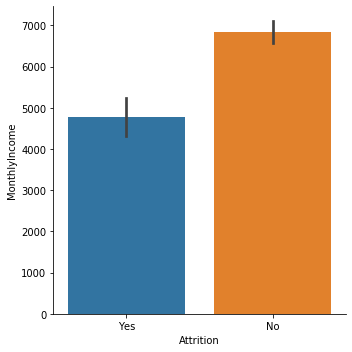

In [0]:
sns.factorplot(data=df,kind='bar',x='Attrition',y='MonthlyIncome')

 Note : The average income for 'No' class is quite higher. Similarly those employees who are probably not earning well will certainly want to change the company.

#### 3.1.6 ) Job Satisfaction

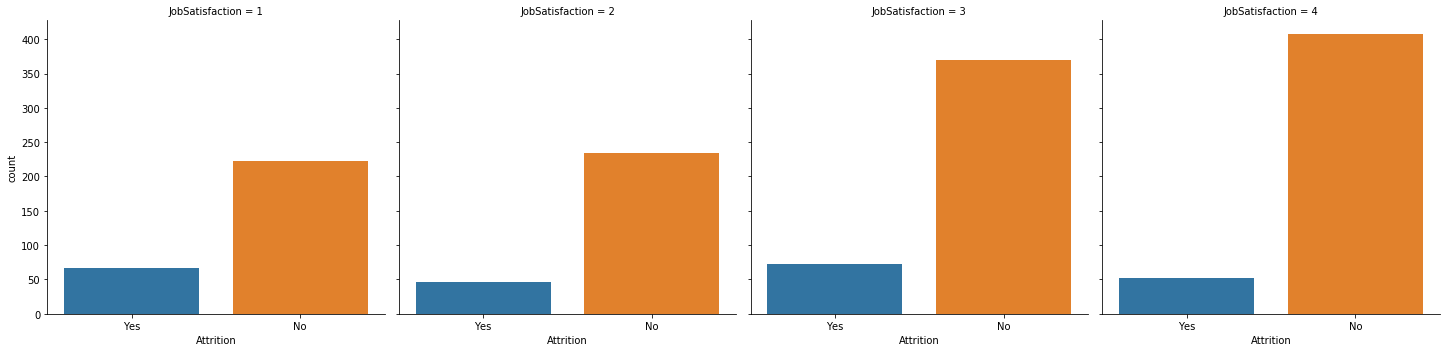

In [0]:
sns.factorplot(data=df,kind='count',x='Attrition',col='JobSatisfaction')

In [0]:
pd.crosstab(columns=[df.Attrition],index=[df.JobSatisfaction],margins=True,normalize='index') 

Attrition,No,Yes
JobSatisfaction,,
1,0.771626,0.228374
2,0.835714,0.164286
3,0.834842,0.165158
4,0.886710,0.113290
All,0.838776,0.161224


Note: For higher values of job satisfaction( ie more a person is satisfied with his/her job) lesser percent of them say a 'Yes' which is quite obvious as highly contented workers will obvioulsy not like to leave the organisation.

#### 3.1.7 ) Environment Satisfaction 

In [0]:
pd.crosstab(columns=[df.Attrition],index=[df.EnvironmentSatisfaction],margins=True,normalize='index')

Attrition,No,Yes
EnvironmentSatisfaction,,
1,0.746479,0.253521
2,0.850174,0.149826
3,0.863135,0.136865
4,0.865471,0.134529
All,0.838776,0.161224


Again we can notice that the relative percent of 'No' in people with higher grade of environment satisfacftion which is expected.

#### 3.1.8 ) Job Involvement

In [0]:
pd.crosstab(columns=[df.Attrition],index=[df.JobInvolvement],margins=True,normalize='index')

Attrition,No,Yes
JobInvolvement,,
1,0.662651,0.337349
2,0.810667,0.189333
3,0.855991,0.144009
4,0.909722,0.090278
All,0.838776,0.161224


#### 3.1.9 ) Work Life Balance

In [0]:
pd.crosstab(columns=[df.Attrition],index=[df.WorkLifeBalance],margins=True,normalize='index')

Attrition,No,Yes
WorkLifeBalance,,
1,0.687500,0.312500
2,0.831395,0.168605
3,0.857783,0.142217
4,0.823529,0.176471
All,0.838776,0.161224


Again we notice a similar trend as people with better work life balance dont want to leave the organisation.

#### 3.1.10 ) RelationshipSatisfaction

In [0]:
pd.crosstab(columns=[df.Attrition],index=[df.RelationshipSatisfaction],margins=True,normalize='index')

Attrition,No,Yes
RelationshipSatisfaction,,
1,0.793478,0.206522
2,0.851485,0.148515
3,0.845316,0.154684
4,0.851852,0.148148
All,0.838776,0.161224


## 3.2 ) Feature Selection

In [19]:
df.drop(['DailyRate','EmployeeCount','EmployeeNumber','HourlyRate','MonthlyRate'
          ,'NumCompaniesWorked','Over18','StandardHours', 'StockOptionLevel','TrainingTimesLastYear'],axis=1,inplace=True)
#df1 = df.loc[:,['DailyRate','EmployeeCount','EmployeeNumber','HourlyRate','MonthlyRate','NumCompaniesWorked','Over18','StandardHours', 'StockOptionLevel','TrainingTimesLastYear']]
#df1.head()
#df1['HourlyRate'].value_counts()



1.over18 features has unique value as Yes

2.EmployeeCount has unique values as 1

3.StandardHours has unique values as 80

4.EmployeeNumber,TrainingTimesLastYear,StockOptionLevel  will not play any role on attrition

<a id="content4"></a>
##  4 ) Preparing Dataset


## 4.1 ) Feature Encoding 

we have used the Label Encoder from the scikit library to encode all the categorical features.

In [20]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder

In [21]:
#We have created User defined function for encoding features
def transform(feature):
    le=LabelEncoder()
    df[feature]=le.fit_transform(df[feature])
    print(le.classes_)
    


In [22]:
cat_df=df.select_dtypes(include='object')
cat_df.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [23]:
for col in cat_df.columns:
    transform(col)


['No' 'Yes']
['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']
['Human Resources' 'Research & Development' 'Sales']
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
['Female' 'Male']
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
['Divorced' 'Married' 'Single']
['No' 'Yes']


In [24]:
df.head() # just to verify.

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,1,2,1,2,0,3,...,1,11,3,1,8,1,6,4,0,5
1,49,0,1,1,8,1,1,3,1,2,...,0,23,4,4,10,3,10,7,1,7
2,37,1,2,1,2,2,4,4,1,2,...,1,15,3,2,7,3,0,0,0,0
3,33,0,1,1,3,4,1,4,0,3,...,1,11,3,3,8,3,8,7,3,0
4,27,0,2,1,2,1,3,1,1,3,...,0,12,3,4,6,3,2,2,2,2


 Below we have used the StandardScaler to scale the data.

## 4.3 ) Splitting the data into training and validation sets

In [27]:
#scaled_df=scaler.fit_transform(df.drop('Attrition',axis=1))
X=df.drop('Attrition',axis=1)
Y=df['Attrition']
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

<a id="content5"></a>
## 5 ) Modelling


## 5.1 ) Handling the Imbalanced dataset

Note that we have a imbalanced dataset with majority of observations being of one type ('NO') in our case. In this dataset for example we have about 84 % of observations having 'No' and only 16 % of 'Yes' and hence this is an imbalanced dataset.

To deal with such a imbalanced dataset we have to take certain measures, otherwise the performance of our model can be significantly affected. In this section I have discussed two approaches to curb such datasets.

## 5.1.1 ) Oversampling the Minority or Undersampling the Majority Class
 
  

Note that in our case the number of observations is already pretty low and so oversampling will be more appropriate.

Below we have used an oversampling technique known as the SMOTE(Synthetic Minority Oversampling Technique) which randomly creates some 'Synthetic' instances of the minority class so that the net observations of both the class get balanced out.


In [28]:


from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=42)
x_train_smote,  y_train_smote = oversampler.fit_sample(x_train,y_train)

Using TensorFlow backend.


## 5.1.2 ) Using the Right Evaluation Metric

Another important point while dealing with the imbalanced classes is the choice of right evaluation metrics. 

**'Precision'**-- (true positives)/(true positives+false positives)

**'Recall'**-- (true positives)/(true positives+false negatives)

**'F1 Score'**-- The harmonic mean of 'precision' and 'recall'

'**AUC ROC'**-- ROC curve is a plot between 'senstivity' (Recall) and '1-specificity' (Specificity=Precision)

**'Confusion Matrix'**-- Plot the entire confusion matrix

## 5.2 ) Building A Model & Making Predictions

In this section we have used different models from the scikit library and trained them on the previously oversampled data and then used them for the prediction purposes.

In [29]:
#import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV


In [30]:
# We have created user defined function for model building :
def compare(model):
    clf=model
    clf.fit(x_train_smote,y_train_smote)
    pred=clf.predict(x_test)
    
    # Calculating various metrics
    
    acc.append(accuracy_score(pred,y_test))
    prec.append(precision_score(pred,y_test))
    rec.append(recall_score(pred,y_test))
    auroc.append(roc_auc_score(pred,y_test))  

In [31]:
acc=[]
prec=[]
rec=[]
auroc=[]
models=[SVC(kernel='rbf'),RandomForestClassifier(),GradientBoostingClassifier(),LogisticRegression(),KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier()]
model_names=['rbfSVM','RandomForestClassifier','GradientBoostingClassifier','LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier']

for model in range(len(models)):
    compare(models[model])
    
d={'Modelling Algo':model_names,'Accuracy':acc,'Precision':prec,'Recall':rec,'Area Under ROC Curve':auroc}
met_df=pd.DataFrame(d)
met_df

,Modelling Algo,Accuracy,Precision,Recall,Area Under ROC Curve
0,rbfSVM,0.730978,0.375000,0.206897,0.550067
1,RandomForestClassifier,0.826087,0.270833,0.309524,0.601081
2,GradientBoostingClassifier,0.815217,0.500000,0.352941,0.636471
3,LogisticRegression,0.720109,0.541667,0.242991,0.579350
4,KNeighborsClassifier,0.614130,0.395833,0.143939,0.510529
5,DecisionTreeClassifier,0.733696,0.375000,0.209302,0.551460


## 5.3 ) Comparing Different Models

In [32]:
def comp_models(met_df,metric):
    sns.factorplot(data=met_df,x=metric,y='Modelling Algo',size=5,aspect=1.5,kind='bar')
    sns.factorplot(data=met_df,y=metric,x='Modelling Algo',size=7,aspect=2,kind='point')

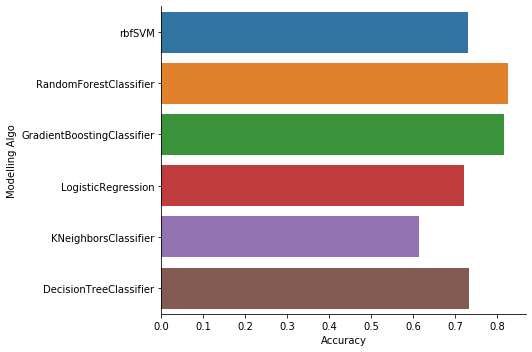

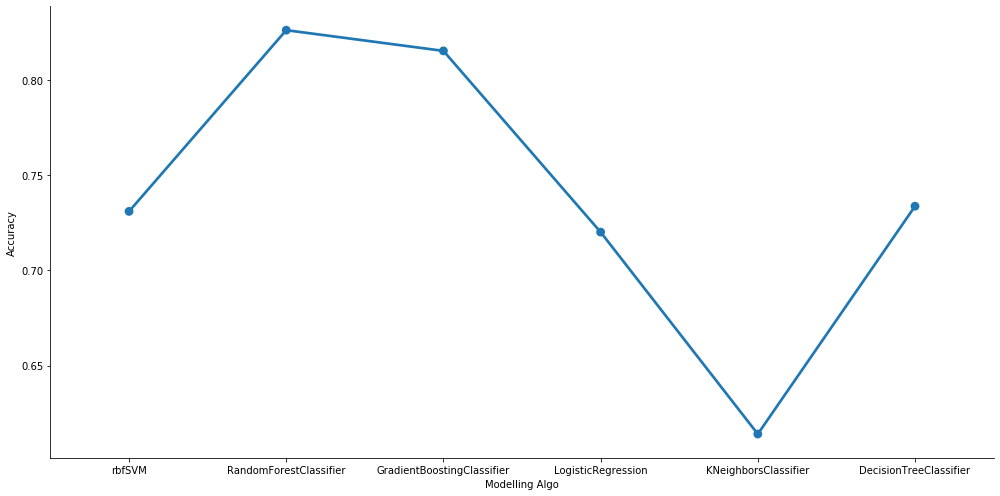

In [33]:
comp_models(met_df,'Accuracy')

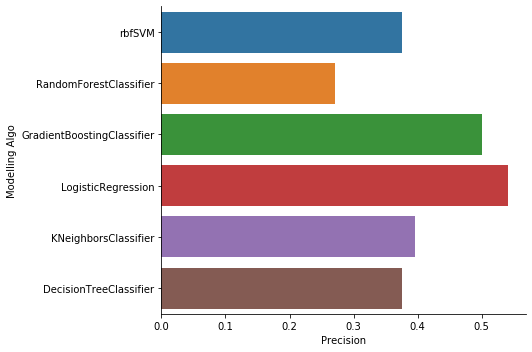

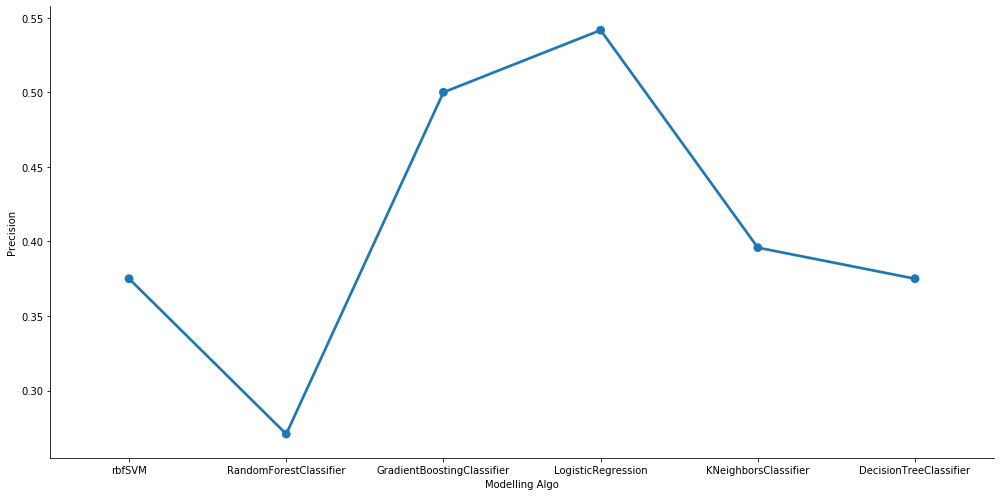

In [34]:
comp_models(met_df,'Precision')

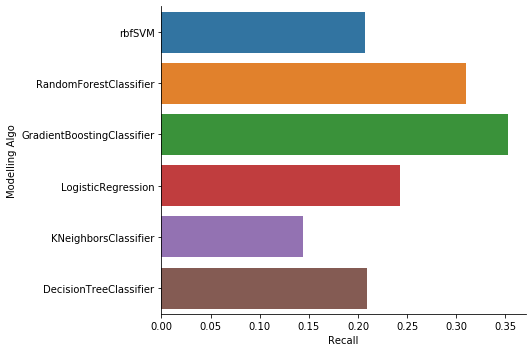

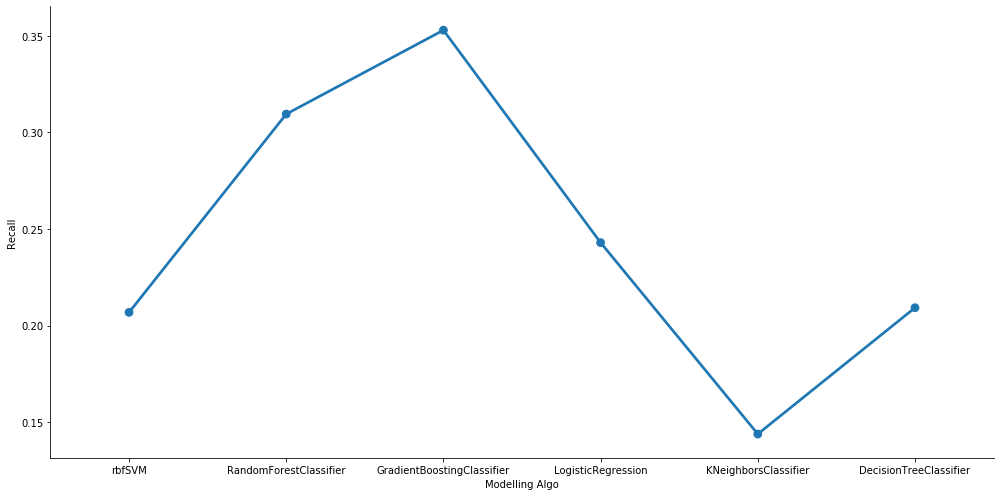

In [35]:
comp_models(met_df,'Recall')

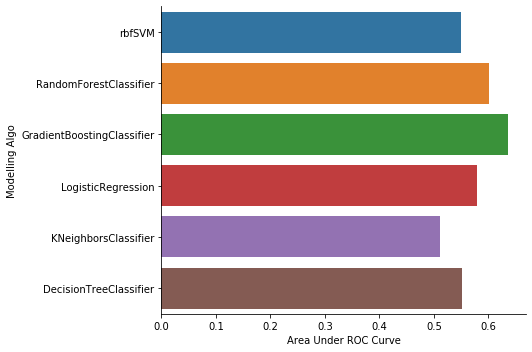

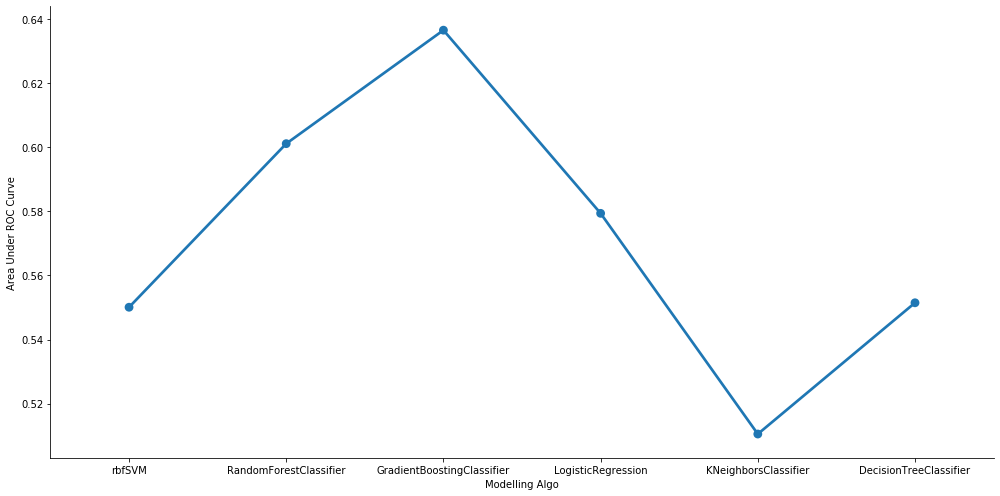

In [36]:
comp_models(met_df,'Area Under ROC Curve')

The above data frame and the visualizations summarize the resuts after training different models on the given dataset.  

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rfc=RandomForestClassifier(n_estimators=50)

In [39]:
rfc.fit(x_train_smote,y_train_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
rfc.feature_importances_

array([0.06674799, 0.03027334, 0.01096485, 0.05166586, 0.02791147,
       0.03477223, 0.0595789 , 0.01306251, 0.05498635, 0.03215181,
       0.03612824, 0.05729906, 0.0206129 , 0.09149116, 0.01810121,
       0.03916287, 0.00785899, 0.04164374, 0.06120301, 0.03328747,
       0.04994291, 0.06589131, 0.03100597, 0.06425586])

In [41]:
df2=pd.DataFrame({"Feature":x_train_smote.columns,"Importance":rfc.feature_importances_})

In [42]:
df2

,Feature,Importance
0,Age,0.066748
1,BusinessTravel,0.030273
2,Department,0.010965
3,DistanceFromHome,0.051666
4,Education,0.027911
5,EducationField,0.034772
6,EnvironmentSatisfaction,0.059579
7,Gender,0.013063
8,JobInvolvement,0.054986
9,JobLevel,0.032152


<a id="content6"></a>
## 6) Conclusions


###### Hence we have completed the analysis of the data and also made predictions using the various ML models.                                           